In [1]:
import sys
sys.path.append('.conda/envs/shear/lib/python3.9/site-packages/')

import numpy as np
import astropy.io.fits as pf
from astropy.table import Table, vstack
import pylab as mplot
import yaml
import h5py
import healpy as hp
import os
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/chihway/.conda/envs/shear/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['vstack']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
full_tile_list1 = np.genfromtxt('/project/chihway/chihway/shearcat/Tilelist/11072023/new_final_list_DR3_1_1.txt', dtype='str', delimiter=",")[1:]
full_tile_list2 = np.genfromtxt('/project/chihway/chihway/shearcat/Tilelist/11072023/new_final_list_DR3_1_2.txt', dtype='str', delimiter=",")[1:]

In [3]:
# gold

print("DR3_1_1")
n=0
for tile in full_tile_list1:
    if not os.path.isfile('/project/chihway/data/decade/coaddcat_v6/gold_'+str(tile[0])+'.fits'):
        print(tile[0])
        n+=1
print(n)

print("DR3_1_2")
n=0
for tile in full_tile_list2:
    if not os.path.isfile('/project/chihway/data/decade/coaddcat_v7/gold_'+str(tile[0])+'.fits'):
        print(tile[0])
        n+=1
print(n)

DR3_1_1
DES0934-0207
DES1014-0124
DES0955-2124
DES1030-2206
DES1117-0750
DES0820+1252
DES0821+1209
DES1120-0750
8
DR3_1_2
DES1606-2206
DES1256-4831
DES1614-2541
DES1618+2543
DES1329-4957
DES1610-0915
DES1656-0624
DES1518+2251
DES1158-4914
DES1220-0750
DES1200-4957
DES1311+1751
DES1720-0541
DES1616-0915
DES1704-1749
DES1256-3332
DES1745-0624
DES1200-4831
DES1205-4957
DES1748-0624
DES1701-1749
DES1615-3332
DES1241-0958
DES1328-5040
DES1559+2334
DES1307-2415
DES1628-0416
DES1219-5123
DES1707-1832
DES1606-2832
DES1622-3332
DES1655-2041
DES1543-2332
DES0959-2706
DES0754+3000
DES1731+0917
DES1607-2458
DES1547-2623
38


In [4]:
# mcal

print("DR3_1_1")
n=0
for tile in full_tile_list1:
    if not os.path.isfile('/project/chihway/data/decade/shearcat_v2/metacal_output_'+str(tile[0])+'.fits'):
        print(tile[0])
        n+=1
print(n)

print("DR3_1_2")
n=0
for tile in full_tile_list2:
    if not os.path.isfile('/project/chihway/data/decade/shearcat_v3/metacal_output_'+str(tile[0])+'.fits'):
        print(tile[0])
        n+=1
print(n)


DR3_1_1
DES1027-1915
DES1041+0335
DES1003+0209
DES1000+0252
DES0919+1626
DES0910-0958
DES1057-0958
DES0908-0915
DES1024-1915
DES0934-0207
DES1014-0124
DES1100-0958
DES0955-2124
DES1000+0209
DES0957+0209
DES1101-0915
DES1026-1832
DES1117-0750
DES1058-0915
DES0907-0958
DES0942-1915
DES0911-0915
DES1120-0750
23
DR3_1_2
DES1527-3123
DES1401-1958
DES1426-2458
DES1025-2706
DES1427-2541
DES1256-4831
DES1618+2543
DES1330-4331
DES1329-4957
DES1524-3206
DES1656-0624
DES1636+0126
DES1518+2251
DES1158-4914
DES1220-0750
DES1200-4957
DES1720-0541
DES1326-4331
DES1527-3206
DES1022-2706
DES1359-1915
DES1328-4249
DES1328-4414
DES1322-4331
DES1704-1749
DES1025-2749
DES1429-2458
DES1745-0624
DES1324-4414
DES1320-4249
DES1348-3249
DES1335-2915
DES1205-4957
DES1748-0624
DES1022-2749
DES1701-1749
DES1615-3332
DES1333-2958
DES1241-0958
DES1328-5040
DES1307-2415
DES1628-0416
DES1219-5123
DES1707-1832
DES1601-1832
DES1606-2832
DES1324-4249
DES1622-3332
DES1655-2041
DES1543-2332
DES0930-2832
DES1340-2958
DES152

In [5]:
import pickle

Ntile1 = len(full_tile_list1)
Ntile2 = len(full_tile_list2)

path = '/project/chihway/data/decade/'

with open(path+"GOLD_Mask.pk", "rb") as file_pk:
    GOLD_Mask = pickle.load(file_pk)

with open(path+"MCAL_Mask.pk", "rb") as file_pk:
    MCAL_Mask = pickle.load(file_pk)

with open(path+"GOLD_Sort.pk", "rb") as file_pk:
    GOLD_Sort = pickle.load(file_pk)

with open(path+"MCAL_Sort.pk", "rb") as file_pk:
    MCAL_Sort = pickle.load(file_pk)


In [6]:
# MCAL_Sort['DES1041+0335']

In [7]:
# DR3_1_1

n1 = 0
n2 = 0
for i in range(Ntile1):
    
    tile = full_tile_list1[i][0]
    
    if (not os.path.isfile('/project/chihway/data/decade/coaddcat_v6/gold_'+str(tile)+'.fits')) or (not os.path.isfile('/project/chihway/data/decade/shearcat_v2/metacal_output_'+str(tile)+'.fits')):
        print("missing", tile)
        n1+=1
    else:
        try:

            Nobj = np.sum(GOLD_Mask[tile]) + np.sum(MCAL_Mask[tile])
            if Nobj==0:
                print("no matched objects", tile)
                n2+=1
        except KeyError:
            print("Oops!", tile)
print(n1, n2)

missing DES1027-1915
missing DES1041+0335
missing DES1003+0209
missing DES1000+0252
missing DES0919+1626
missing DES0910-0958
missing DES1057-0958
missing DES0908-0915
missing DES1024-1915
missing DES0934-0207
missing DES1014-0124
missing DES1100-0958
missing DES0955-2124
missing DES1000+0209
missing DES1030-2206
missing DES0957+0209
missing DES1101-0915
missing DES1026-1832
missing DES1117-0750
missing DES1058-0915
missing DES0907-0958
missing DES0820+1252
missing DES0942-1915
missing DES0821+1209
missing DES0911-0915
missing DES1120-0750
26 0


In [8]:
# DR3_1_2

n1 = 0
n2 = 0
for i in range(Ntile2):
    
    tile = full_tile_list2[i][0]
    
    if (not os.path.isfile('/project/chihway/data/decade/coaddcat_v7/gold_'+str(tile)+'.fits')) or (not os.path.isfile('/project/chihway/data/decade/shearcat_v3/metacal_output_'+str(tile)+'.fits')):
        print("missing", tile)
        n1+=1
    else:
        Nobj = np.sum(GOLD_Mask[tile]) + np.sum(MCAL_Mask[tile])
        if Nobj==0:
            print("no matched objects", tile)
            n2+=1
print(n1, n2)

missing DES1527-3123
missing DES1401-1958
missing DES1426-2458
missing DES1025-2706
missing DES1427-2541
missing DES1606-2206
missing DES1256-4831
missing DES1614-2541
missing DES1618+2543
missing DES1330-4331
missing DES1329-4957
missing DES1610-0915
missing DES1524-3206
missing DES1656-0624
missing DES1636+0126
missing DES1518+2251
missing DES1158-4914
missing DES1220-0750
missing DES1200-4957
missing DES1311+1751
missing DES1720-0541
missing DES1616-0915
missing DES1326-4331
missing DES1527-3206
missing DES1022-2706
missing DES1359-1915
missing DES1328-4249
missing DES1328-4414
missing DES1322-4331
missing DES1704-1749
missing DES1025-2749
missing DES1256-3332
missing DES1429-2458
missing DES1745-0624
missing DES1324-4414
missing DES1320-4249
missing DES1348-3249
missing DES1335-2915
missing DES1200-4831
missing DES1205-4957
missing DES1748-0624
missing DES1022-2749
missing DES1701-1749
missing DES1615-3332
missing DES1333-2958
missing DES1241-0958
missing DES1328-5040
missing DES15

In [26]:
# DR3_1_1

string = 'tile,path,ra,dec,gold,mcal,nobj'+'\n'
with open('tile_check_DR3_1_1.txt', 'w') as f:
    f.write(string)
    
for i in range(Ntile1):
    
    tile = full_tile_list1[i][0]
    ra = full_tile_list1[i][2]
    dec = full_tile_list1[i][3]
    pp = full_tile_list1[i][1]
    
    if os.path.isfile('/project/chihway/data/decade/coaddcat_v6/gold_'+str(tile)+'.fits'):
        gold = 1
    else:
        gold = 0
    if os.path.isfile('/project/chihway/data/decade/shearcat_v2/metacal_output_'+str(tile)+'.fits') and os.path.isfile('/project/chihway/data/decade/shearcat_v2/ids_match_'+str(tile)+'.npz'):
        mcal = 1
    else:
        mcal = 0
        
    if mcal==0 or gold==0:
        njob = 0

    else: 
        Nobj = np.sum(GOLD_Mask[tile]) + np.sum(MCAL_Mask[tile])
        if Nobj>0:
            njob = 1
        else:
            njob = 0

    string = tile+','+str(pp)+','+str(ra)+','+str(dec)+','+str(gold)+','+str(mcal)+','+str(njob)+'\n'
    with open('tile_check_DR3_1_1.txt', 'a') as f:
        f.write(string)
    


In [27]:
# DR3_1_2

string = 'tile,path,ra,dec,gold,mcal,nobj'+'\n'
with open('tile_check_DR3_1_2.txt', 'w') as f:
    f.write(string)
    
for i in range(Ntile2):
    
    tile = full_tile_list2[i][0]
    ra = full_tile_list2[i][2]
    dec = full_tile_list2[i][3]
    pp = full_tile_list2[i][1]
    
    if os.path.isfile('/project/chihway/data/decade/coaddcat_v7/gold_'+str(tile)+'.fits'):
        gold = 1
    else:
        gold = 0
    if os.path.isfile('/project/chihway/data/decade/shearcat_v3/metacal_output_'+str(tile)+'.fits') and os.path.isfile('/project/chihway/data/decade/shearcat_v3/ids_match_'+str(tile)+'.npz'):
        mcal = 1
    else:
        mcal = 0
        
    if mcal==0 or gold==0:
        njob = 0

    else: 
        Nobj = np.sum(GOLD_Mask[tile]) + np.sum(MCAL_Mask[tile])
        if Nobj>0:
            njob = 1
        else:
            njob = 0

    string = tile+','+str(pp)+','+str(ra)+','+str(dec)+','+str(gold)+','+str(mcal)+','+str(njob)+'\n'
    with open('tile_check_DR3_1_2.txt', 'a') as f:
        f.write(string)
    

In [34]:
RA = []
DEC = []
FLAG = []

N11=0
N12=0
N13=0
N14=0
N15=0

N21=0
N22=0
N23=0
N24=0
N25=0


read1 = np.genfromtxt('tile_check_DR3_1_1.txt', dtype='str', delimiter=",")[1:]

for i in range(Ntile1):
    
    tile_check = read1[i][0]
    
    RA.append(float(read1[i][2]))
    DEC.append(float(read1[i][3]))
    
    gold = int(read1[i][4])
    mcal = int(read1[i][5])
    nobj = int(read1[i][6])
    
    # everything is ok
    if gold==1 and mcal==1 and nobj==1:
        FLAG.append(0)
        N11+=1
        
    # missing gold only
    if gold==0 and mcal==1 and nobj==0:
        FLAG.append(1)
        N12+=1
        
    # missing mcal only
    if gold==1 and mcal==0 and nobj==0:
        FLAG.append(2)
        N13+=1
        
    # not missing anything but no matched objects
    if gold==1 and mcal==1 and nobj==0:
        FLAG.append(3)
        N14+=1

    # everything is missing
    if gold==0 and mcal==0 and nobj==0:
        FLAG.append(4)
        N15+=1
        

print("====================================")

read2 = np.genfromtxt('tile_check_DR3_1_2.txt', dtype='str', delimiter=",")[1:]

for i in range(Ntile2):

    tile_check = read2[i][0]

    RA.append(float(read2[i][2]))
    DEC.append(float(read2[i][3]))
    
    gold = int(read2[i][4])
    mcal = int(read2[i][5])
    nobj = int(read2[i][6])
    
    # everything is ok
    if gold==1 and mcal==1 and nobj==1:
        FLAG.append(0)
        N21+=1
        
    # missing gold only
    if gold==0 and mcal==1 and nobj==0:
        FLAG.append(1)
        N22+=1

    # missing mcal only
    if gold==1 and mcal==0 and nobj==0:
        FLAG.append(2)
        N23+=1
        
    # not missing anything but no matched objects
    if gold==1 and mcal==1 and nobj==0:
        FLAG.append(3)
        N24+=1
        
    # everything is missing
    if gold==0 and mcal==0 and nobj==0:
        FLAG.append(4)
        N25+=1


In [35]:
N11, N12, N13, N14, N15

(6658, 3, 18, 0, 5)

In [36]:
N21, N22, N23, N24, N25

(10102, 11, 30, 0, 27)

In [37]:
N11+N21, N12+N22, N13+N23, N14+N24, N15+N25

(16760, 14, 48, 0, 32)

In [32]:
N1+N2+N3+N4+N5

16854

In [33]:
6684+10170

16854

In [30]:
# tile_check = 'DES1041+0335'
# dir1 = '/project/chihway/data/decade/shearcat_v2/'
# dir2 = '/project/chihway/data/decade/shearcat_v4/'
# os.system('mv '+str(dir1)+'metacal_output_'+str(tile_check)+'.fits '+str(dir2)+'metacal_output_'+str(tile_check)+'.fits')
# os.system('mv '+str(dir1)+'ids_match_'+str(tile_check)+'.npz '+str(dir2)+'ids_match_'+str(tile_check)+'.npz')



16854 16854


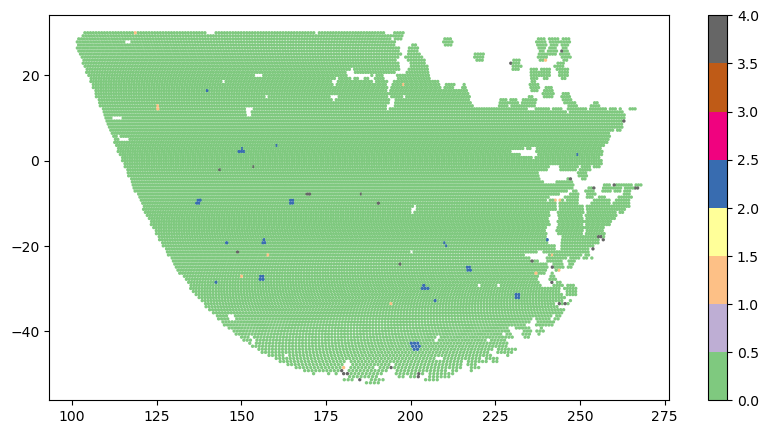

In [31]:
print(len(RA), len(FLAG))
mplot.figure(figsize=(10,5))
mplot.scatter(RA, DEC, c=FLAG, s=2, cmap='Accent')
mplot.colorbar()

In [53]:
# to check -- is it just that the metacal files need to be rerun for the IDs to 
# match up? still not sure how they got the IDs

In [54]:
# spot check 3 such files, see if the objects are there, 
# just IDs are messed up (what is the solution to this?)

In [18]:
tile_check = 'DES1041+0335'

gold_tile = pf.open('/project/chihway/data/decade/coaddcat_v6/gold_'+str(tile_check)+'.fits')
mcal_tile = pf.open('/project/chihway/data/decade/shearcat_v4/metacal_output_'+str(tile_check)+'.fits')


In [19]:
id_gold = gold_tile[1].data['COADD_OBJECT_ID']

In [20]:
id_mcal = mcal_tile[1].data['id']

In [21]:
len(id_gold), len(id_mcal)

(59395, 59367)

In [22]:
# rerunning metacal for this tile, mainly to see if the IDs change... not sure what to do if not?! 
# where does the IDs come from in the MEDS files?

In [23]:
import meds

X = meds.MEDS('/scratch/midway3/chihway/delve_metacal/tile_58/decade.ncsa.illinois.edu/deca_archive/DEC_Taiga/multiepoch/delve/r6101/DES1041+0335/p01/meds/DES1041+0335_r6101p01_g_meds-delve.fits.fz')


OSError: FITSIO status = 104: could not open the named file
failed to find or open the following file: (ffopen)
/scratch/midway3/chihway/delve_metacal/tile_58/decade.ncsa.illinois.edu/deca_arc
hive/DEC_Taiga/multiepoch/delve/r6101/DES1041+0335/p01/meds/DES1041+0335_r6101p0
1_g_meds-delve.fits.fz


In [ ]:
A = X['id'].copy()

In [ ]:
B = id_gold.copy()

In [24]:
len(A), len(B)
print(np.sort(A))
print(np.sort(B))
print(np.sort(id_mcal))

[8104477111 8104477112 8104477113 ... 8104539840 8104539841 8104539842]
[8104477111 8104477112 8104477115 ... 8104539167 8104539168 8104539175]
[8104477111 8104477112 8104477113 ... 8104539839 8104539840 8104539842]


In [7]:
# tiles that failed metacal == bad tiles

In [7]:
with h5py.File('/project2/chihway/data/decade/metacal_test_20230427.hdf', 'r') as h5r:

    size = h5r['mcal_T_ratio_noshear'][:]
    s2n = h5r['mcal_s2n_noshear'][:]
    ra = h5r['ra'][:]
    dec = h5r['dec'][:]

In [17]:
RA_tile = []
DEC_tile = []
for i in range(len(bad_tile_list)):
    tile = bad_tile_list[i][3:]
    ra_hr = float(tile[:2])*15
    ra_min = float(tile[2:4])/60*15
    ra_tile = ra_hr+ra_min
    dec_sign = np.sign(float(tile[4:7]))
    dec_deg = float(tile[5:7])
    dec_arcmin = float(tile[7:9])/60
    dec_tile = dec_sign*(dec_deg+dec_arcmin)
    RA_tile.append(ra_tile)
    DEC_tile.append(dec_tile)

In [18]:
mask = (size>0.5)*(s2n>10)
ra_mask = ra[mask]
dec_mask = dec[mask]

In [19]:
nside = 1024
map_counts = np.zeros(hp.nside2npix(nside))

phi = ra_mask/180*np.pi
theta = (90.-dec_mask)/180*np.pi

pix = hp.ang2pix(nside, theta, phi)

In [20]:
for i in range(len(pix)):
    map_counts[pix[i]] += 1

In [21]:
pix_footprint = np.arange(hp.nside2npix(nside))
pix_footprint = pix_footprint[map_counts>0]

In [22]:
theta_footprint, phi_footprint = hp.pix2ang(nside, pix_footprint)
ra_footprint = phi_footprint/np.pi*180
dec_footprint = 90 - theta_footprint/np.pi*180

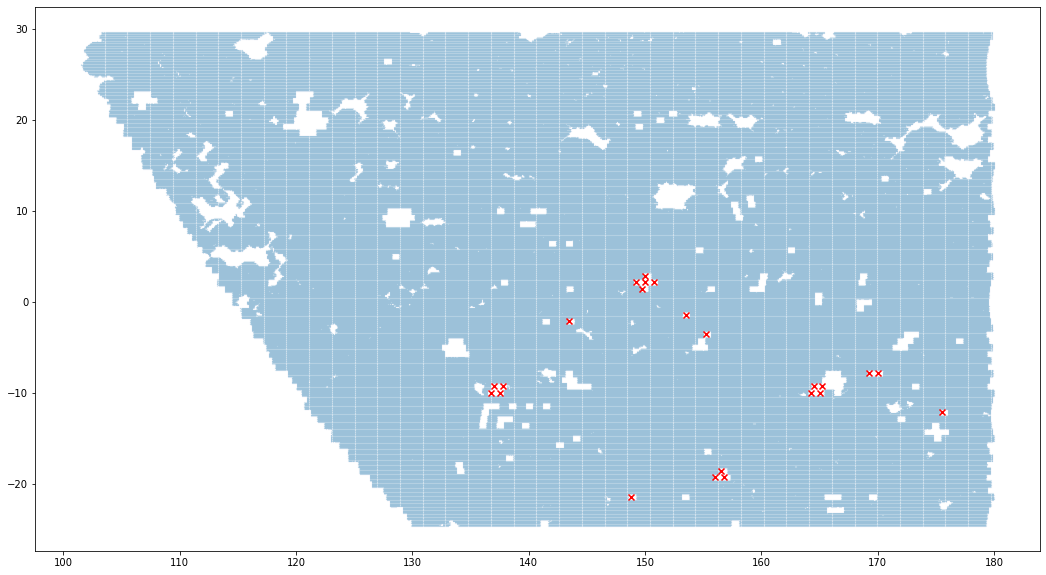

In [23]:
mplot.figure(figsize=(18,10))
mplot.scatter(ra_footprint, dec_footprint, marker='.', s=0.01)
mplot.scatter(RA_tile, DEC_tile, marker='x', c='r')

In [15]:
len(map_counts[map_counts>0]), len(ra), len(ra_mask)

(993829, 111596425, 56876460)

In [16]:
len(map_counts[map_counts>0])/len(map_counts)*np.pi*(180**2/np.pi**2)*4

3258.2592348694093

In [25]:
tilelistname_1 = '/project/chihway/chihway/shearcat/Tilelist/11072023/Tilelist_DR3_1_1_withASTROFIX.csv'
tilelistname_2 = '/project/chihway/chihway/shearcat/Tilelist/11072023/Tilelist_DR3_1_2_withASTROFIX.csv'

tilelist1 = np.genfromtxt(tilelistname_1, dtype='str', delimiter=",")[1:]
tilelist2 = np.genfromtxt(tilelistname_2, dtype='str', delimiter=",")[1:]

In [40]:
RA_good1 = []
DEC_good1 = []
RA_bad1 = []
DEC_bad1 = []

n = 0
for i in range(len(tilelist1)):
    tile = tilelist1[i][0]
    if os.path.isfile('/project/chihway/data/decade/shearcat_v2/metacal_output_'+str(tile)+'.fits'):
        RA_good1.append(float(tilelist1[i][2]))
        DEC_good1.append(float(tilelist1[i][3]))
    else:
        print(i, tile)
        RA_bad1.append(float(tilelist1[i][2]))
        DEC_bad1.append(float(tilelist1[i][3]))
        n+=1
print("total missing files", n)

52 DES1027-1915
382 DES1003+0209
516 DES1000+0252
671 DES0910-0958
684 DES1057-0958
719 DES0908-0915
730 DES1024-1915
1139 DES0934-0207
1594 DES1014-0124
1955 DES1100-0958
2181 DES0955-2124
2257 DES1000+0209
3233 DES1142-1207
3480 DES0957+0209
3619 DES1101-0915
3775 DES1026-1832
3894 DES0959+0126
4198 DES1117-0750
4227 DES1058-0915
4295 DES0907-0958
6445 DES0911-0915
6651 DES1120-0750
total missing files 22


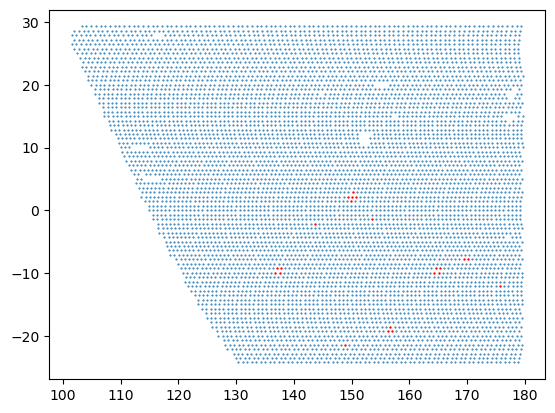

In [41]:
mplot.scatter(RA_good1, DEC_good1, marker='.', s=1)
mplot.scatter(RA_bad1, DEC_bad1, marker='.', s=2, c='r')

In [42]:
n = 0
RA_good2 = []
DEC_good2 = []
RA_bad2 = []
DEC_bad2 = []
for i in range(len(tilelist2)):
    tile = tilelist2[i][0]
    if os.path.isfile('/project/chihway/data/decade/shearcat_v3/metacal_output_'+str(tile)+'.fits'):
        RA_good2.append(float(tilelist2[i][2]))
        DEC_good2.append(float(tilelist2[i][3]))
    else:
        print(i, tile)
        n+=1
        RA_bad2.append(float(tilelist2[i][2]))
        DEC_bad2.append(float(tilelist2[i][3]))
print("total missing files", n)

90 DES1527-3123
228 DES1401-1958
245 DES1426-2458
413 DES1025-2706
470 DES1427-2541
497 DES1256-4831
754 DES1618+2543
1066 DES1330-4331
1077 DES1329-4957
1217 DES1524-3206
1597 DES1656-0624
1615 DES1636+0126
1653 DES1028-3457
1674 DES1518+2251
1820 DES1158-4914
1905 DES1338-2915
1963 DES1348-3332
2539 DES1220-0750
2589 DES1200-4957
2660 DES1720-0541
3189 DES1326-4331
3359 DES1527-3206
3413 DES1022-2706
3516 DES1359-1915
3768 DES1328-4249
3776 DES1328-4414
3890 DES1520-3206
4105 DES1322-4331
4220 DES1704-1749
4604 DES1025-2749
4642 DES1429-2458
4758 DES1745-0624
5167 DES1324-4414
5675 DES1320-4249
5702 DES1348-3249
5895 DES1335-2915
5934 DES1424-2541
6130 DES1205-4957
6252 DES1748-0624
6284 DES1022-2749
6387 DES1701-1749
6402 DES1615-3332
6413 DES1333-2958
6450 DES1241-0958
6964 DES1328-5040
6996 DES1307-2415
7047 DES1628-0416
7488 DES1219-5123
7778 DES1707-1832
8080 DES1606-2832
8137 DES1324-4249
8187 DES1622-3332
8593 DES1655-2041
8642 DES1543-2332
8913 DES1051-3706
8940 DES1251-4123


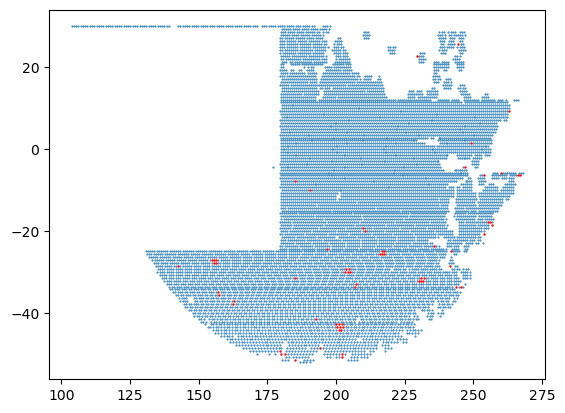

In [43]:
mplot.scatter(RA_good2, DEC_good2, marker='.', s=1)
mplot.scatter(RA_bad2, DEC_bad2, marker='.', s=2, c='r')

Text(0, 0.5, 'Dec')

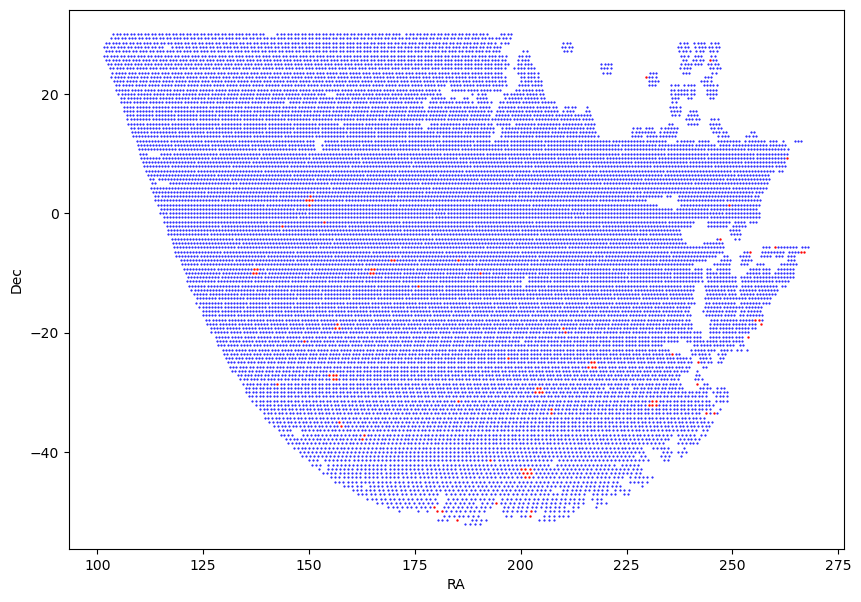

In [46]:
mplot.figure(figsize=(10,7))
mplot.scatter(RA_good1, DEC_good1, marker='.', s=1, c='b')
mplot.scatter(RA_bad1, DEC_bad1, marker='.', s=2, c='r')
mplot.scatter(RA_good2, DEC_good2, marker='.', s=1, c='b')
mplot.scatter(RA_bad2, DEC_bad2, marker='.', s=2, c='r')
mplot.xlabel('RA')
mplot.ylabel('Dec')


## Make final list

In [1]:
tilelistname_1 = '/project/chihway/chihway/shearcat/Tilelist/11072023/Tilelist_DR3_1_1_withASTROFIX.csv'
tilelistname_2 = '/project/chihway/chihway/shearcat/Tilelist/11072023/Tilelist_DR3_1_2_withASTROFIX.csv'

new_tilelistname_1 = '/project/chihway/chihway/shearcat/Tilelist/11072023/NewTiles_DR3_1_1.csv'
new_tilelistname_2 = '/project/chihway/chihway/shearcat/Tilelist/11072023/NewTiles_DR3_1_2.csv'


In [6]:
tile1 = np.genfromtxt(tilelistname_1, dtype='str', delimiter=",")[1:]
tile2 = np.genfromtxt(tilelistname_2, dtype='str', delimiter=",")[1:]
new_tile1 = np.genfromtxt(new_tilelistname_1, dtype='str', delimiter=",")[1:]
new_tile2 = np.genfromtxt(new_tilelistname_2, dtype='str', delimiter=",")[1:]

tile1_array = tile1[:,0]
tile2_array = tile2[:,0]
new_tile1_array = new_tile1[:,0]
new_tile2_array = new_tile2[:,0]


In [22]:
with open('/project/chihway/chihway/shearcat/Tilelist/11072023/new_final_list_DR3_1_1.txt', 'w') as f:
    f.write('TILENAME,PATH,RA_CENT,DEC_CENT'+'\n')
with open('/project/chihway/chihway/shearcat/Tilelist/11072023/new_final_list_DR3_1_2.txt', 'w') as f:
    f.write('TILENAME,PATH,RA_CENT,DEC_CENT'+'\n')

In [23]:
for i in range(len(tile1)):
    if tile1_array[i] in new_tile1_array:
        ids = np.where(new_tile1_array==tile1_array[i])
        string = new_tile1[ids[0][0]][0]+','+new_tile1[ids[0][0]][1]+','+new_tile1[ids[0][0]][2]+','+new_tile1[ids[0][0]][3]+'\n'
    else:
        string = tile1[i][0]+','+tile1[i][1]+','+tile1[i][2]+','+tile1[i][3]+'\n'
    with open('/project/chihway/chihway/shearcat/Tilelist/11072023/new_final_list_DR3_1_1.txt', 'a') as f:
        f.write(string)

In [24]:
for i in range(len(tile2)):
    if tile2_array[i] in new_tile2_array:
        ids = np.where(new_tile2_array==tile2_array[i])
        string = new_tile2[ids[0][0]][0]+','+new_tile2[ids[0][0]][1]+','+new_tile2[ids[0][0]][2]+','+new_tile2[ids[0][0]][3]+'\n'
    else:
        string = tile2[i][0]+','+tile2[i][1]+','+tile2[i][2]+','+tile2[i][3]+'\n'
    with open('/project/chihway/chihway/shearcat/Tilelist/11072023/new_final_list_DR3_1_2.txt', 'a') as f:
        f.write(string)

In [20]:
len(tile1_array)

6684

In [21]:
len(tile2_array)

10170

## Check missing files for gold and metacal and matched

Starting from the same list we want to check:
* how many metacal files are missing
* now many gold files are missing
* how many matched files are missing

In [ ]:
gold_dir = ''

In [119]:
scratch_filelist = os.listdir('/scratch/midway3/chihway/delve_metacal')
scratch_filelist.sort()

In [120]:
n=0
for A in scratch_filelist:
    X = os.system('ls -l /scratch/midway3/chihway/delve_metacal1/'+A+'/decade.ncsa.illinois.edu/deca_archive/DEC_Taiga/multiepoch/delve/r*/DES*/*/meds/*fz >temp')
    Y = np.genfromtxt('temp', dtype='str')
    if Y[:,4].astype('int').sum()/1e9>40:
        print(Y[0,8][-42:-30], A, Y[:,4].astype('int').sum()/1e9, 'G')
        n+=1
print(n)

0


In [122]:
scratch_filelist = os.listdir('/scratch/midway3/chihway/delve_metacal')
scratch_filelist.sort()

In [123]:
n = 0
for A in scratch_filelist:
#     X = os.system('ls -l /scratch/midway3/chihway/delve_metacal/'+A+'/decade.ncsa.illinois.edu/deca_archive/DEC_Taiga/multiepoch/delve/r*/DES*/*/meds/*fz >temp')
    Y = np.genfromtxt('/scratch/midway3/chihway/delve_metacal/'+A+'/temp', dtype='str')
    if Y[:,4].astype('int').sum()/1e9<40:
        print(Y[0,8][-42:-30], A, Y[:,4].astype('int').sum()/1e9, 'G')
        n+=1
print(n)

DES1050-3749 tile_10076 23.86443744 G
DES1329-4957 tile_1077 4.2799968 G


FileNotFoundError: /scratch/midway3/chihway/delve_metacal/tile_1139/temp not found.

In [78]:
print(Y)

[['-rw-rw-r--' '1' 'chihway' 'chihway' '11540468160' 'Aug' '29' '2022'
  '/scratch/midway3/chihway/delve_metacal/tile_3619/decade.ncsa.illinois.edu/deca_archive/DEC_Taiga/multiepoch/delve/r5918/DES1101-0915/p02/meds/DES1101-0915_r5918p02_g_meds-delve.fits.fz']
 ['-rw-rw-r--' '1' 'chihway' 'chihway' '13355735040' 'Aug' '29' '2022'
  '/scratch/midway3/chihway/delve_metacal/tile_3619/decade.ncsa.illinois.edu/deca_archive/DEC_Taiga/multiepoch/delve/r5918/DES1101-0915/p02/meds/DES1101-0915_r5918p02_i_meds-delve.fits.fz']
 ['-rw-rw-r--' '1' 'chihway' 'chihway' '11857216320' 'Aug' '29' '2022'
  '/scratch/midway3/chihway/delve_metacal/tile_3619/decade.ncsa.illinois.edu/deca_archive/DEC_Taiga/multiepoch/delve/r5918/DES1101-0915/p02/meds/DES1101-0915_r5918p02_r_meds-delve.fits.fz']
 ['-rw-rw-r--' '1' 'chihway' 'chihway' '12099381120' 'Aug' '29' '2022'
  '/scratch/midway3/chihway/delve_metacal/tile_3619/decade.ncsa.illinois.edu/deca_archive/DEC_Taiga/multiepoch/delve/r5918/DES1101-0915/p02/meds/D